# Tutorial: Linear Regression, Classification, Unsupervised Learning, and Loss Functions
 
In this notebook, we illustrate:

1. **Linear Regression:** Using synthetic data, we fit a linear model, plot the results, and compute common regression losses.
2. **Linear Classification:** We generate a binary classification dataset, train a logistic regression model, and visualize the decision boundary.
3. **Unsupervised Machine Learning:** We create a synthetic clustered dataset and perform k-means clustering.
4. **Loss Functions:** We explore different loss functions for regression and classification with illustrative plots.

## 1. Linear Regression Example
 
In this section, we:
- Generate synthetic data based on a linear relationship with noise.
- Fit a linear regression model.
- Visualize the data along with the fitted regression line.
- Compute common regression losses: Mean Squared Error (MSE) and Mean Absolute Error (MAE).

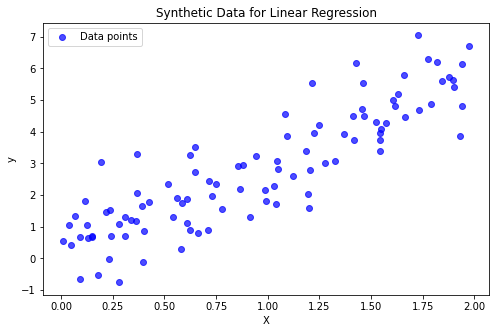

Fitted Linear Model: y = 2.770 * x + 0.215
Mean Squared Error (MSE): 0.807
Mean Absolute Error (MAE): 0.701


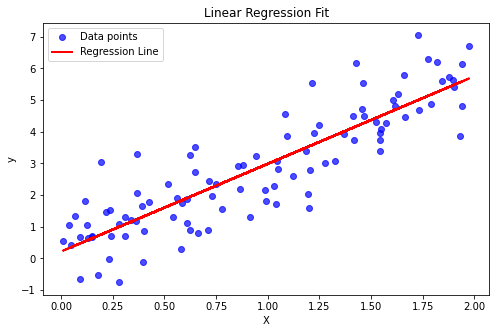

In [1]:
# Import required libraries for linear regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For reproducibility
np.random.seed(42)

# Generate synthetic data
# y = 3 * x + noise, where noise ~ N(0, 1)
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)
y = 3 * X.squeeze() + np.random.randn(n_samples)

# Visualize the generated data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data for Linear Regression")
plt.legend()
plt.show()

# %%
# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Make predictions
y_pred = lin_reg.predict(X)

# Compute loss functions
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"Fitted Linear Model: y = {lin_reg.coef_[0]:.3f} * x + {lin_reg.intercept_:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# %%
# Plot the regression line along with data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


## 2. Linear Classification Example

Here, we:
- Generate a synthetic binary classification dataset.
- Fit a logistic regression model.
- Plot the data points along with the decision boundary.

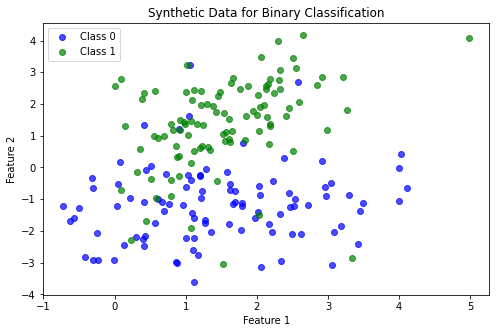

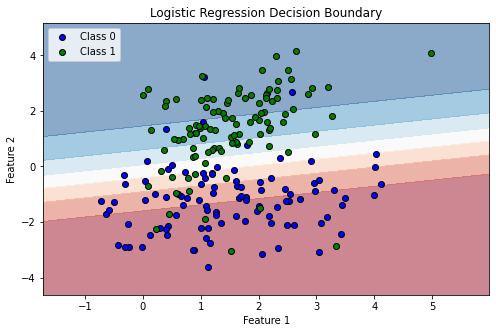

In [2]:
# Import required libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic classification data
X_class, y_class = make_classification(n_samples=200, n_features=2, 
                                         n_redundant=0, n_informative=2,
                                         n_clusters_per_class=1, flip_y=0.1,
                                         class_sep=1.5, random_state=42)

# Visualize the classification data
plt.figure(figsize=(8, 5))
plt.scatter(X_class[y_class == 0][:, 0], X_class[y_class == 0][:, 1], 
            color='blue', alpha=0.7, label='Class 0')
plt.scatter(X_class[y_class == 1][:, 0], X_class[y_class == 1][:, 1], 
            color='green', alpha=0.7, label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data for Binary Classification")
plt.legend()
plt.show()

# %%
# Fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_class, y_class)

# Create a mesh to plot the decision boundary
x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities for each point in the mesh
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot decision boundary with contour
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdBu)
plt.scatter(X_class[y_class == 0][:, 0], X_class[y_class == 0][:, 1], 
            color='blue', edgecolor='k', label='Class 0')
plt.scatter(X_class[y_class == 1][:, 0], X_class[y_class == 1][:, 1], 
            color='green', edgecolor='k', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()


# 3. Unsupervised Machine Learning Example: K-Means Clustering
In this section, we:
- Generate synthetic data that naturally clusters.
- Apply k-means clustering to identify the clusters.
- Visualize the clusters along with the centroids.

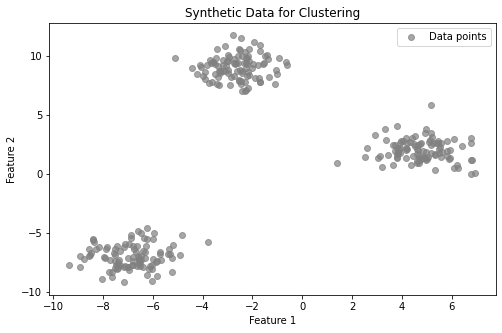

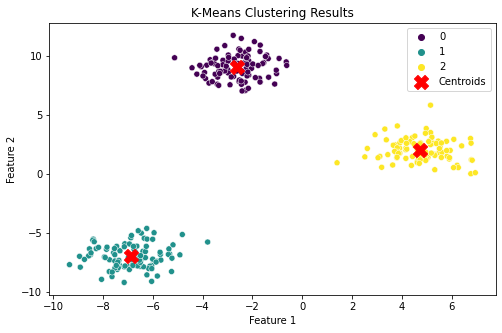

In [3]:
# Import necessary functions for clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 3 clusters
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Plot the raw data
plt.figure(figsize=(8, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='gray', alpha=0.7, label='Data points')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data for Clustering")
plt.legend()
plt.show()

# %%
# Fit k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_blobs)

# Plot the clusters and centroids
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=y_kmeans, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()



## 4. Loss Functions for Regression and Classification
 
In this section, we illustrate:
- **Regression Losses:** Mean Squared Error (MSE) and Mean Absolute Error (MAE).
- **Classification Losses:** Log Loss (a.k.a. Cross Entropy Loss) and Hinge Loss.

We will plot these loss functions as a function of prediction error for better visualization.


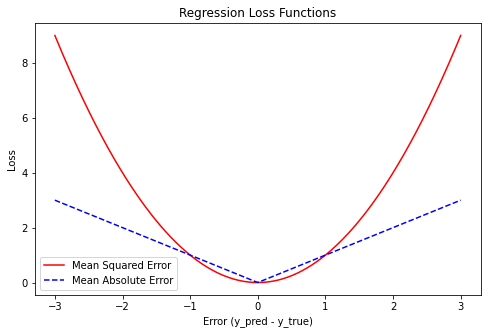

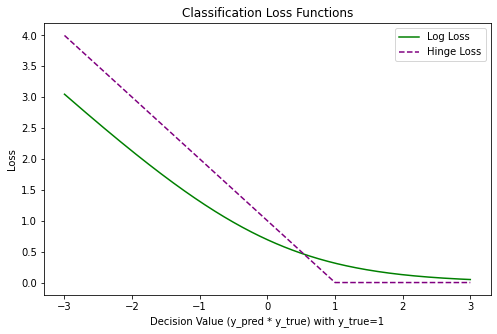

In [4]:
# Import additional metrics for classification losses
from sklearn.metrics import log_loss, hinge_loss

# Define a range of error values for illustration
errors = np.linspace(-3, 3, 400)

# Regression Loss Functions
mse_loss = errors**2
mae_loss = np.abs(errors)

# Classification Loss Functions
# For logistic (log) loss, we assume a true label y=1.
# The logistic loss for a prediction f is: L = log(1 + exp(-y*f)) with y in {1, -1}
# Here, we illustrate with y=1.
log_loss_vals = np.log1p(np.exp(-errors))

# For hinge loss: L = max(0, 1 - y*f)
hinge_loss_vals = np.maximum(0, 1 - errors)

# %%
# Plot regression loss functions
plt.figure(figsize=(8, 5))
plt.plot(errors, mse_loss, label="Mean Squared Error", color='red')
plt.plot(errors, mae_loss, label="Mean Absolute Error", color='blue', linestyle='--')
plt.xlabel("Error (y_pred - y_true)")
plt.ylabel("Loss")
plt.title("Regression Loss Functions")
plt.legend()
plt.show()

# %%
# Plot classification loss functions
plt.figure(figsize=(8, 5))
plt.plot(errors, log_loss_vals, label="Log Loss", color='green')
plt.plot(errors, hinge_loss_vals, label="Hinge Loss", color='purple', linestyle='--')
plt.xlabel("Decision Value (y_pred * y_true) with y_true=1")
plt.ylabel("Loss")
plt.title("Classification Loss Functions")
plt.legend()
plt.show()


## Conclusion

In this tutorial, we:
- Demonstrated linear regression with synthetic data and computed common regression losses.
- Built a logistic regression model for binary classification and visualized its decision boundary.
- Performed k-means clustering on synthetic data to uncover natural groupings.
- Compared various loss functions used in regression and classification tasks.

This notebook serves as a concise tutorial for basic machine learning methods and the evaluation metrics associated with them.

In [ ]:


# %%
# Import required libraries for linear regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For reproducibility
np.random.seed(42)

# Generate synthetic data
# y = 3 * x + noise, where noise ~ N(0, 1)
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)
y = 3 * X.squeeze() + np.random.randn(n_samples)

# Visualize the generated data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data for Linear Regression")
plt.legend()
plt.show()

# %%
# Fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Make predictions
y_pred = lin_reg.predict(X)

# Compute loss functions
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print(f"Fitted Linear Model: y = {lin_reg.coef_[0]:.3f} * x + {lin_reg.intercept_:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# %%
# Plot the regression line along with data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# %% [markdown]
# ## 2. Linear Classification Example
# 
# Here, we:
# - Generate a synthetic binary classification dataset.
# - Fit a logistic regression model.
# - Plot the data points along with the decision boundary.

# %%
# Import required libraries for classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate synthetic classification data
X_class, y_class = make_classification(n_samples=200, n_features=2, 
                                         n_redundant=0, n_informative=2,
                                         n_clusters_per_class=1, flip_y=0.1,
                                         class_sep=1.5, random_state=42)

# Visualize the classification data
plt.figure(figsize=(8, 5))
plt.scatter(X_class[y_class == 0][:, 0], X_class[y_class == 0][:, 1], 
            color='blue', alpha=0.7, label='Class 0')
plt.scatter(X_class[y_class == 1][:, 0], X_class[y_class == 1][:, 1], 
            color='green', alpha=0.7, label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data for Binary Classification")
plt.legend()
plt.show()

# %%
# Fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_class, y_class)

# Create a mesh to plot the decision boundary
x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities for each point in the mesh
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot decision boundary with contour
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdBu)
plt.scatter(X_class[y_class == 0][:, 0], X_class[y_class == 0][:, 1], 
            color='blue', edgecolor='k', label='Class 0')
plt.scatter(X_class[y_class == 1][:, 0], X_class[y_class == 1][:, 1], 
            color='green', edgecolor='k', label='Class 1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()

# %% [markdown]
# ## 3. Unsupervised Machine Learning Example: K-Means Clustering
# 
# In this section, we:
# - Generate synthetic data that naturally clusters.
# - Apply k-means clustering to identify the clusters.
# - Visualize the clusters along with the centroids.

# %%
# Import necessary functions for clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 3 clusters
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Plot the raw data
plt.figure(figsize=(8, 5))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c='gray', alpha=0.7, label='Data points')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data for Clustering")
plt.legend()
plt.show()

# %%
# Fit k-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_blobs)

# Plot the clusters and centroids
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=y_kmeans, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

# %% [markdown]
# ## 4. Loss Functions for Regression and Classification
# 
# In this section, we illustrate:
# - **Regression Losses:** Mean Squared Error (MSE) and Mean Absolute Error (MAE).
# - **Classification Losses:** Log Loss (a.k.a. Cross Entropy Loss) and Hinge Loss.
# 
# We will plot these loss functions as a function of prediction error for better visualization.

# %%
# Import additional metrics for classification losses
from sklearn.metrics import log_loss, hinge_loss

# Define a range of error values for illustration
errors = np.linspace(-3, 3, 400)

# Regression Loss Functions
mse_loss = errors**2
mae_loss = np.abs(errors)

# Classification Loss Functions
# For logistic (log) loss, we assume a true label y=1.
# The logistic loss for a prediction f is: L = log(1 + exp(-y*f)) with y in {1, -1}
# Here, we illustrate with y=1.
log_loss_vals = np.log1p(np.exp(-errors))

# For hinge loss: L = max(0, 1 - y*f)
hinge_loss_vals = np.maximum(0, 1 - errors)

# %%
# Plot regression loss functions
plt.figure(figsize=(8, 5))
plt.plot(errors, mse_loss, label="Mean Squared Error", color='red')
plt.plot(errors, mae_loss, label="Mean Absolute Error", color='blue', linestyle='--')
plt.xlabel("Error (y_pred - y_true)")
plt.ylabel("Loss")
plt.title("Regression Loss Functions")
plt.legend()
plt.show()

# %%
# Plot classification loss functions
plt.figure(figsize=(8, 5))
plt.plot(errors, log_loss_vals, label="Log Loss", color='green')
plt.plot(errors, hinge_loss_vals, label="Hinge Loss", color='purple', linestyle='--')
plt.xlabel("Decision Value (y_pred * y_true) with y_true=1")
plt.ylabel("Loss")
plt.title("Classification Loss Functions")
plt.legend()
plt.show()

# %% [markdown]
# ## Conclusion
# 
# In this tutorial, we:
# - Demonstrated linear regression with synthetic data and computed common regression losses.
# - Built a logistic regression model for binary classification and visualized its decision boundary.
# - Performed k-means clustering on synthetic data to uncover natural groupings.
# - Compared various loss functions used in regression and classification tasks.
# 
# This notebook serves as a concise tutorial for basic machine learning methods and the evaluation metrics associated with them.
